<a href="https://colab.research.google.com/github/pauaaco/PROYECTOS/blob/main/Copia_de_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from google.colab import files
from google.colab import drive
drive.mount("/content/drive")
data= pd.read_csv("/content/drive/MyDrive/dataset (1).csv")
data


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,3
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,3
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,3
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,3


In [ ]:
data.dtypes


Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [ ]:
data['Marital status']= data['Marital status'].astype(str)
data['Application mode']= data['Application mode'].astype(str)
data['Course']= data['Course'].astype(str)
data['Daytime/evening attendance']= data['Daytime/evening attendance'].astype(str)
data['Previous qualification']= data['Previous qualification'].astype(str)
data['Nacionality']= data['Nacionality'].astype(str)
data["Mother's qualification"]= data["Mother's qualification"].astype(str)
data["Father's qualification"]= data["Father's qualification"].astype(str)
data["Mother's occupation"]= data["Mother's occupation"].astype(str)
data["Father's occupation"]= data["Father's occupation"].astype(str)
data["Displaced"]= data["Displaced"].astype(str)
data["Educational special needs"]= data["Educational special needs"].astype(str)
data["Debtor"]= data["Debtor"].astype(str)
data["Tuition fees up to date"]= data["Tuition fees up to date"].astype(str)
data["Gender"]= data["Gender"].astype(str)
data["Scholarship holder"]= data["Scholarship holder"].astype(str)
data["International"]= data["International"].astype(str)
data["Target"]= data["Target"].astype(str)
data.dtypes

Marital status                                     object
Application mode                                   object
Application order                                   int64
Course                                             object
Daytime/evening attendance                         object
Previous qualification                             object
Nacionality                                        object
Mother's qualification                             object
Father's qualification                             object
Mother's occupation                                object
Father's occupation                                object
Displaced                                          object
Educational special needs                          object
Debtor                                             object
Tuition fees up to date                            object
Gender                                             object
Scholarship holder                                 object
Age at enrollm

In [ ]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                  

In [ ]:
data.describe()

,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,1.313793,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,2.000000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,9.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


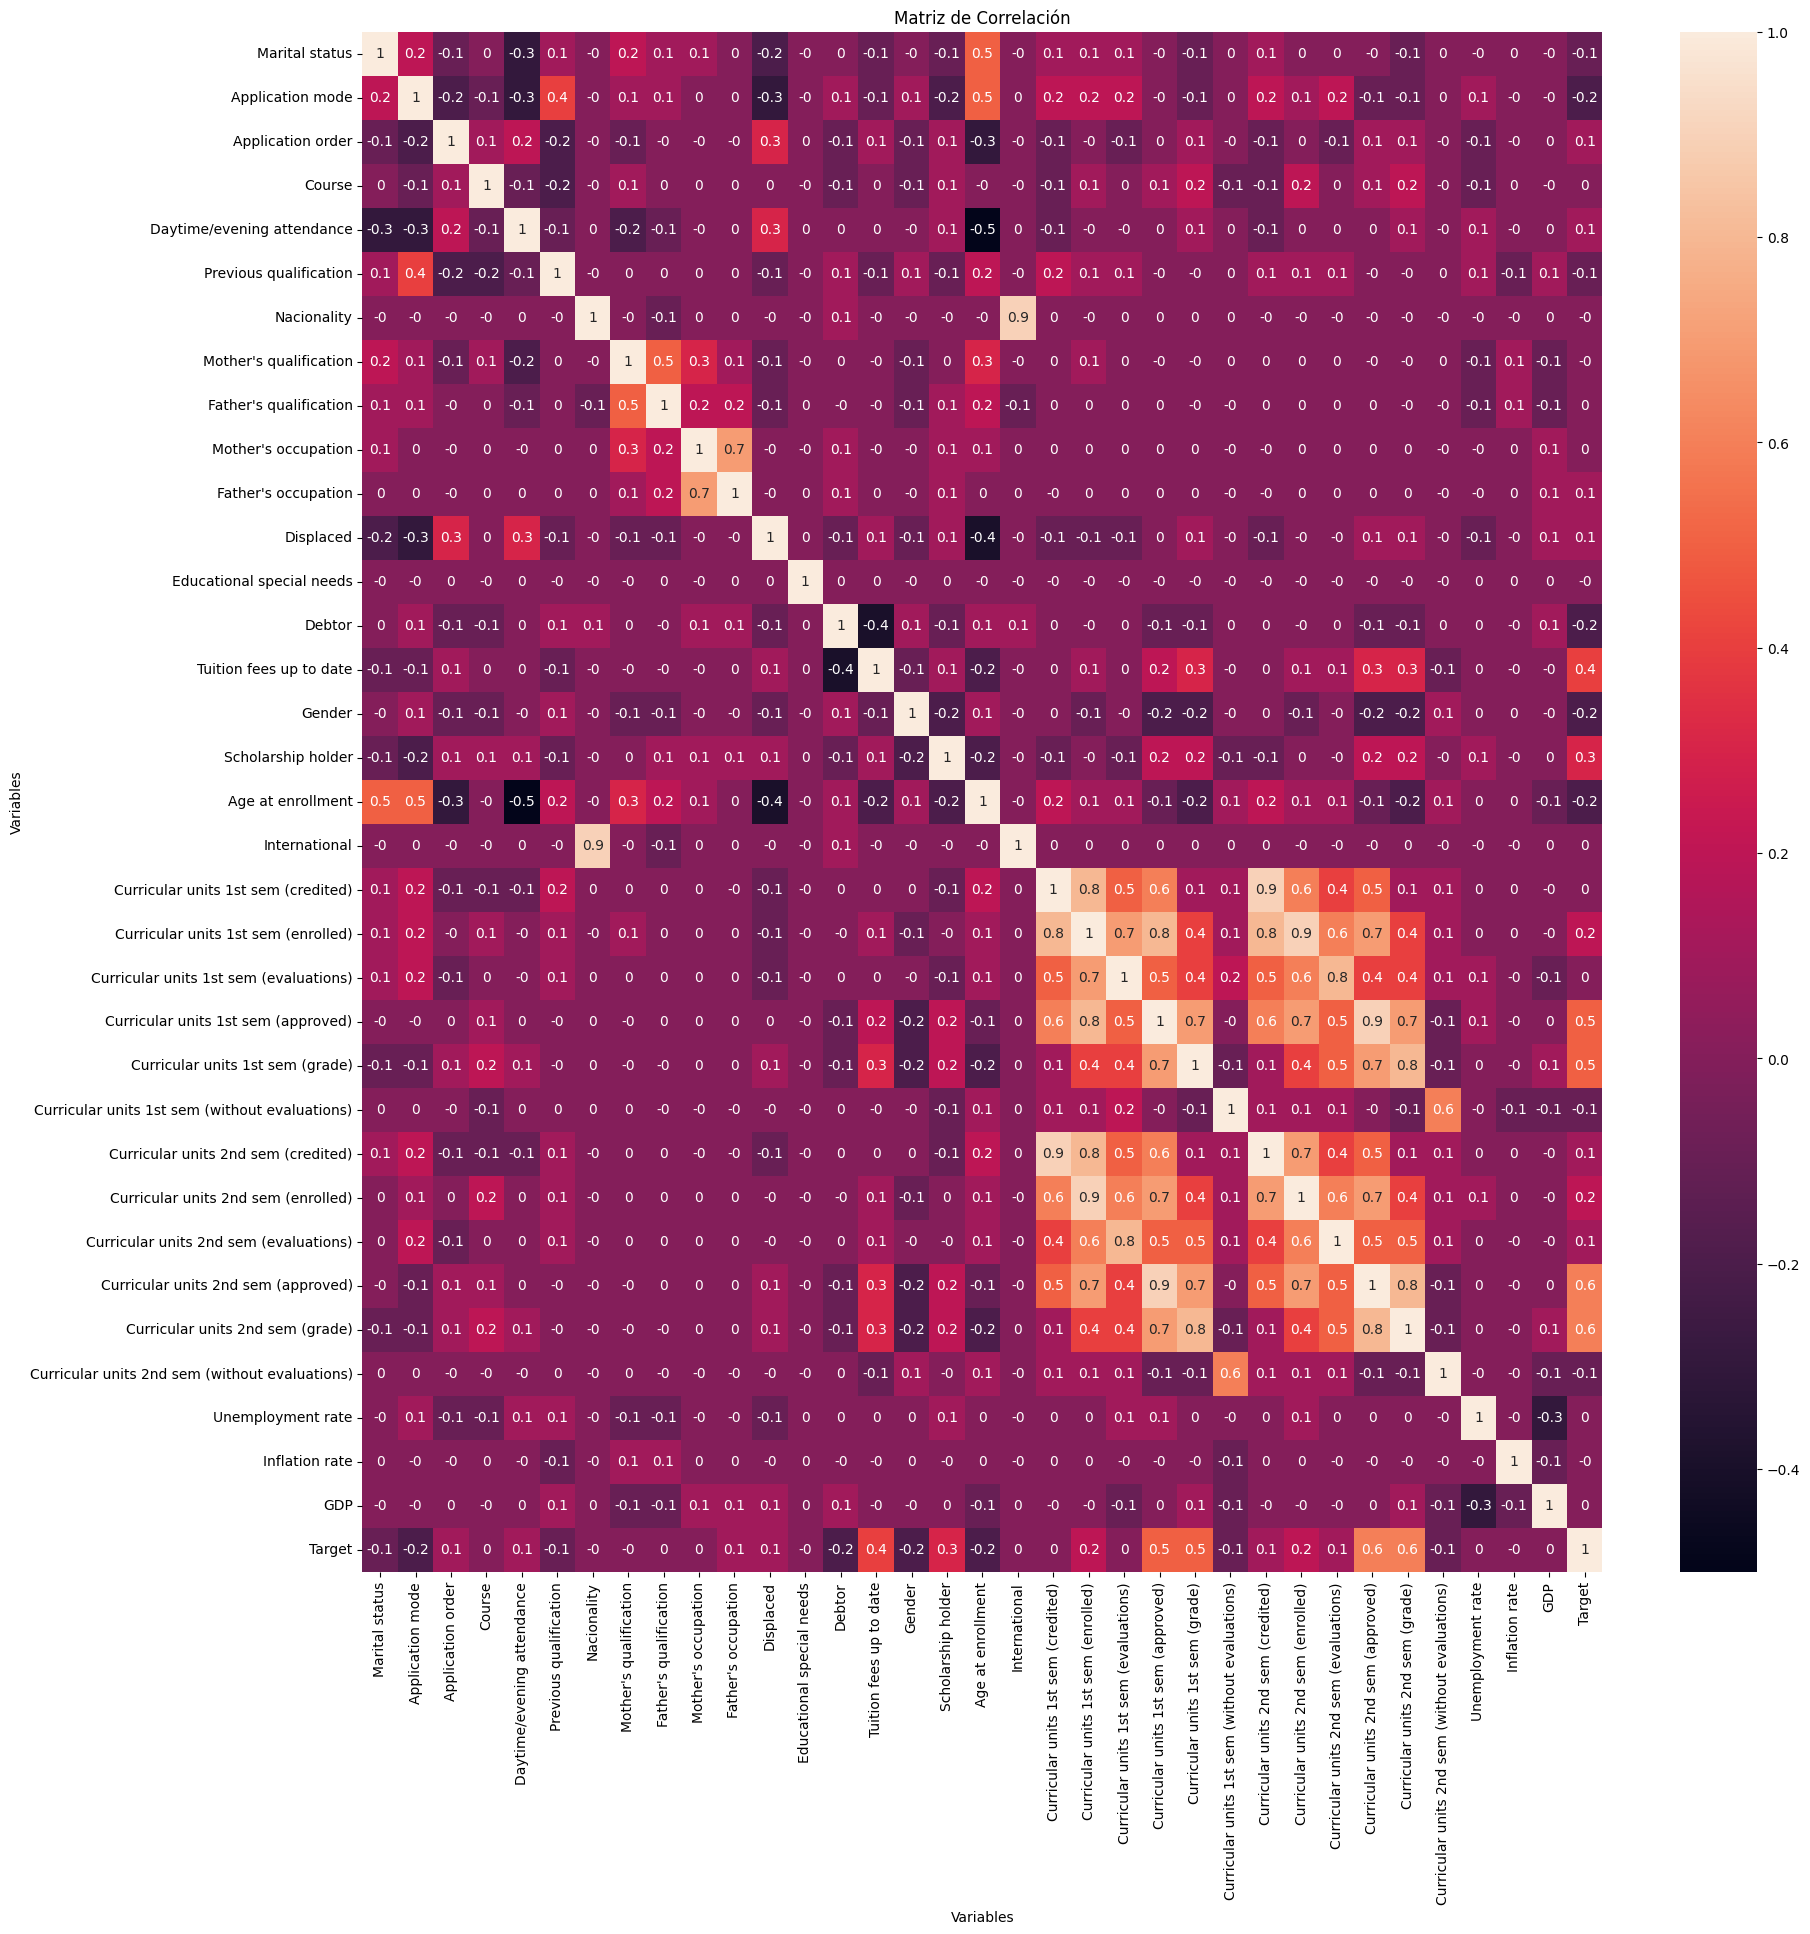

In [ ]:
corr_matrix=data.corr().round(1)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True)

plt.xlabel("Variables")
plt.ylabel("Variables")
plt.title("Matriz de Correlación")

plt.show()


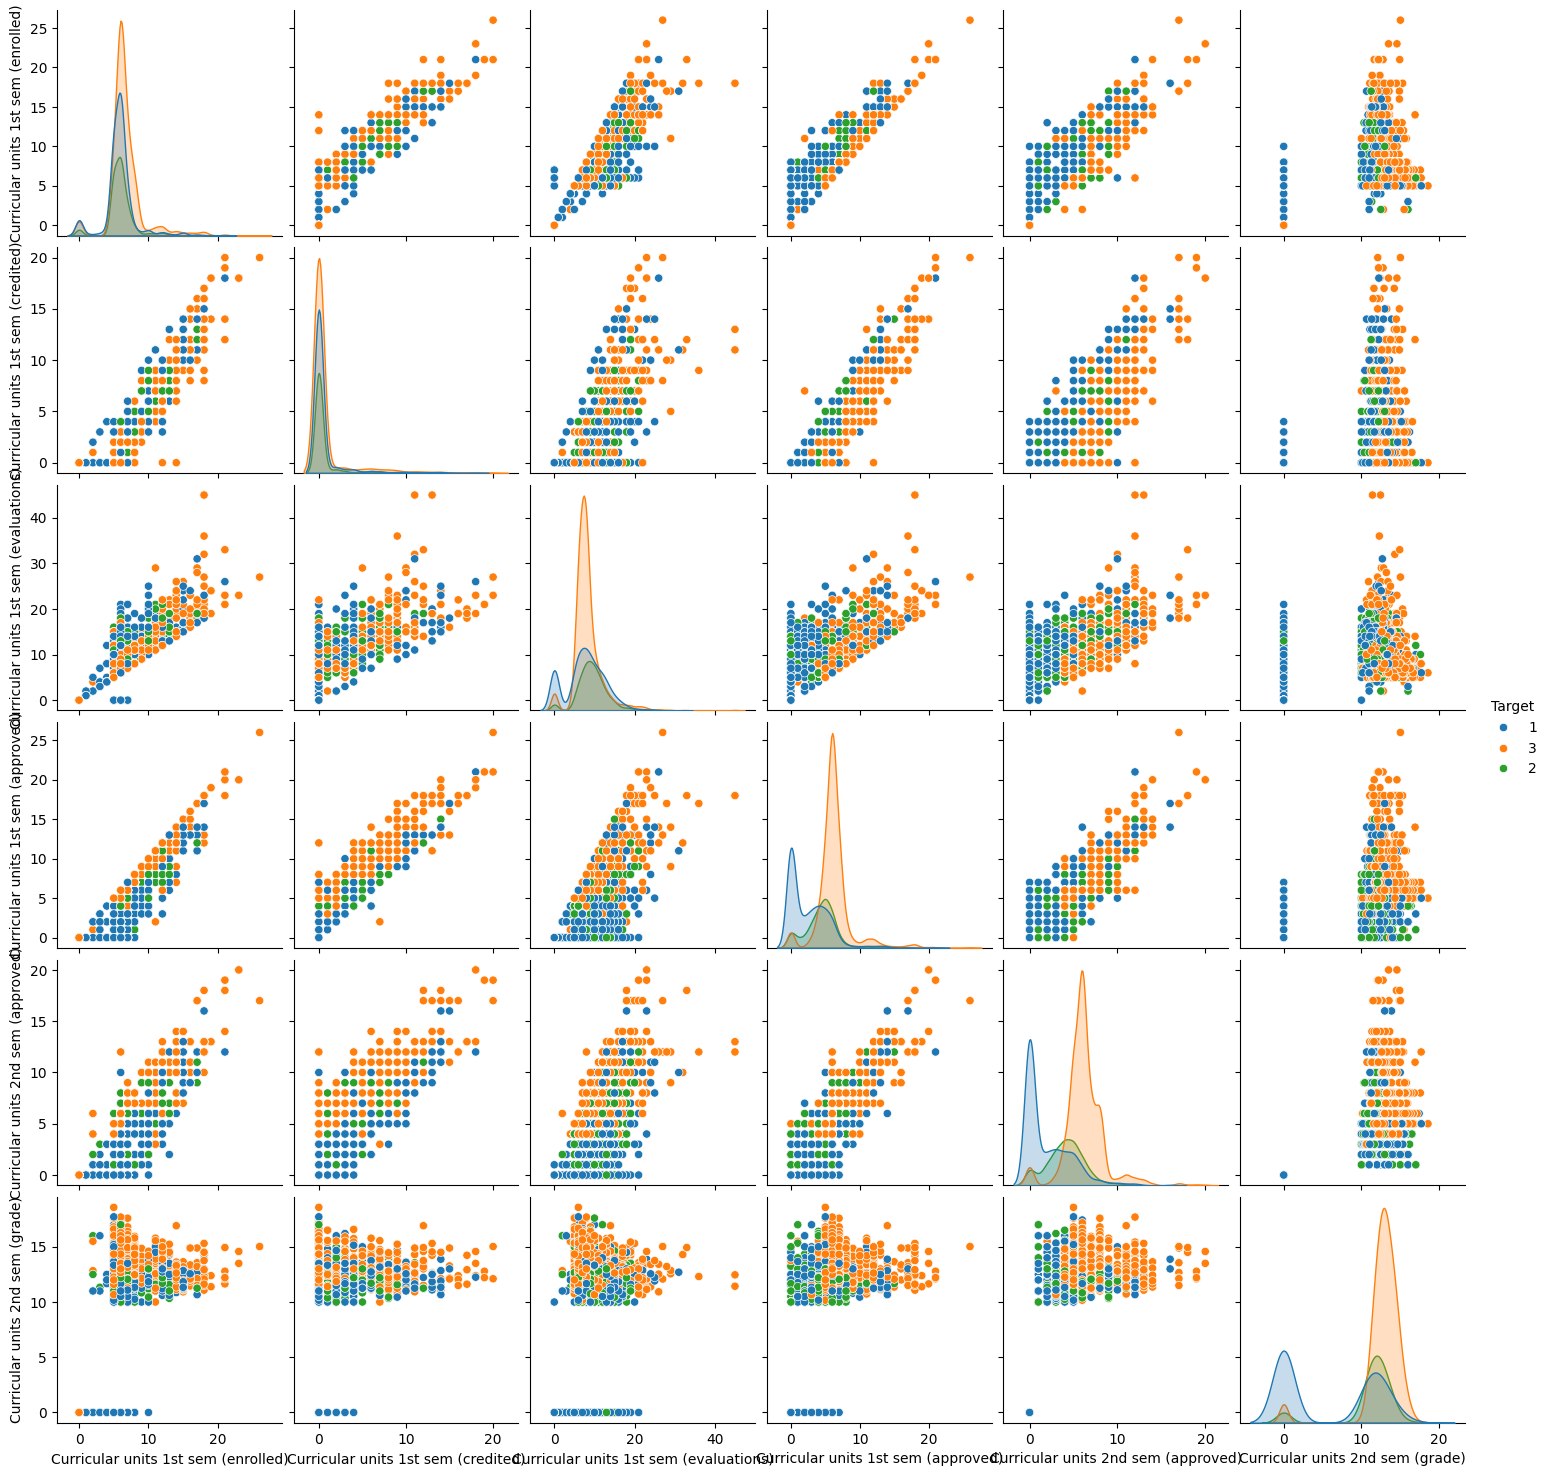

In [ ]:
sns.pairplot(data, vars=["Curricular units 1st sem (enrolled)","Curricular units 1st sem (credited)","Curricular units 1st sem (evaluations)","Curricular units 1st sem (approved)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"],hue="Target")

In [ ]:
X=data[["Curricular units 1st sem (enrolled)","Curricular units 1st sem (credited)","Curricular units 1st sem (evaluations)","Curricular units 1st sem (approved)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"]]
y=data['Target']
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,3
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,3
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,3
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,3


NAIVE BAYES

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

In [ ]:
clf=GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.82      0.58      0.68       406
           2       0.43      0.46      0.44       241
           3       0.79      0.90      0.84       681

    accuracy                           0.72      1328
   macro avg       0.68      0.65      0.65      1328
weighted avg       0.73      0.72      0.72      1328



RANDOM FOREST

In [ ]:
import numpy as np
X=data[["Curricular units 1st sem (enrolled)","Curricular units 1st sem (credited)","Curricular units 1st sem (evaluations)","Curricular units 1st sem (approved)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"]]
y=data['Target']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std= sc.transform(X_train)
X_test_std= sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
bosque=RandomForestClassifier(n_estimators=50,criterion='gini',max_features='sqrt',max_depth=10)
bosque.fit(X_train_std,y_train)
#precisión global
print('Train Accuracy: %.5f'% bosque.score(X_train,y_train))
print('Test Accuracy: %.5f'% bosque.score(X_test,y_test))



Train Accuracy: 0.60336
Test Accuracy: 0.62048


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


[Text(0.5, 1.0, 'RF2024'),
 Text(0.5, 0, 'Clases predichas'),
 Text(0, 0.5, 'Clases verdaderas')]

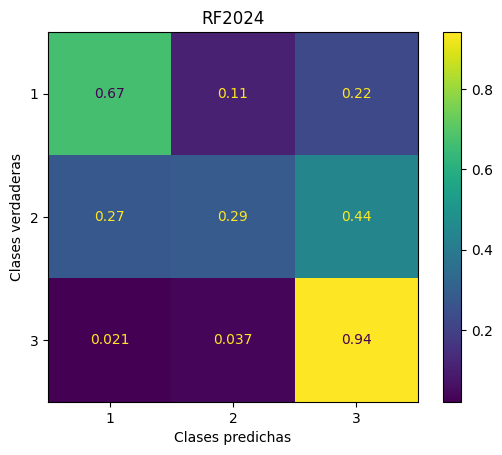

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = bosque.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred, normalize='true')

cm_display = ConfusionMatrixDisplay(cm, display_labels=['1','2','3'])
cm_display.plot()
cm_display.ax_.set(title='RF2024', xlabel='Clases predichas', ylabel='Clases verdaderas')

ARBOL DE DESICIÓN

In [ ]:
import numpy as np
X=data[["Curricular units 1st sem (enrolled)","Curricular units 1st sem (credited)","Curricular units 1st sem (evaluations)","Curricular units 1st sem (approved)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"]]
y=data['Target']


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)



In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std= sc.transform(X_train)
X_test_std= sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
arbol=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
arbol.fit(X_train,y_train)
print('Train Accuracy: %.5f'% arbol.score(X_train,y_train))
print('Test Accuracy: %.5f'% arbol.score(X_test,y_test))

Train Accuracy: 0.72674
Test Accuracy: 0.71611


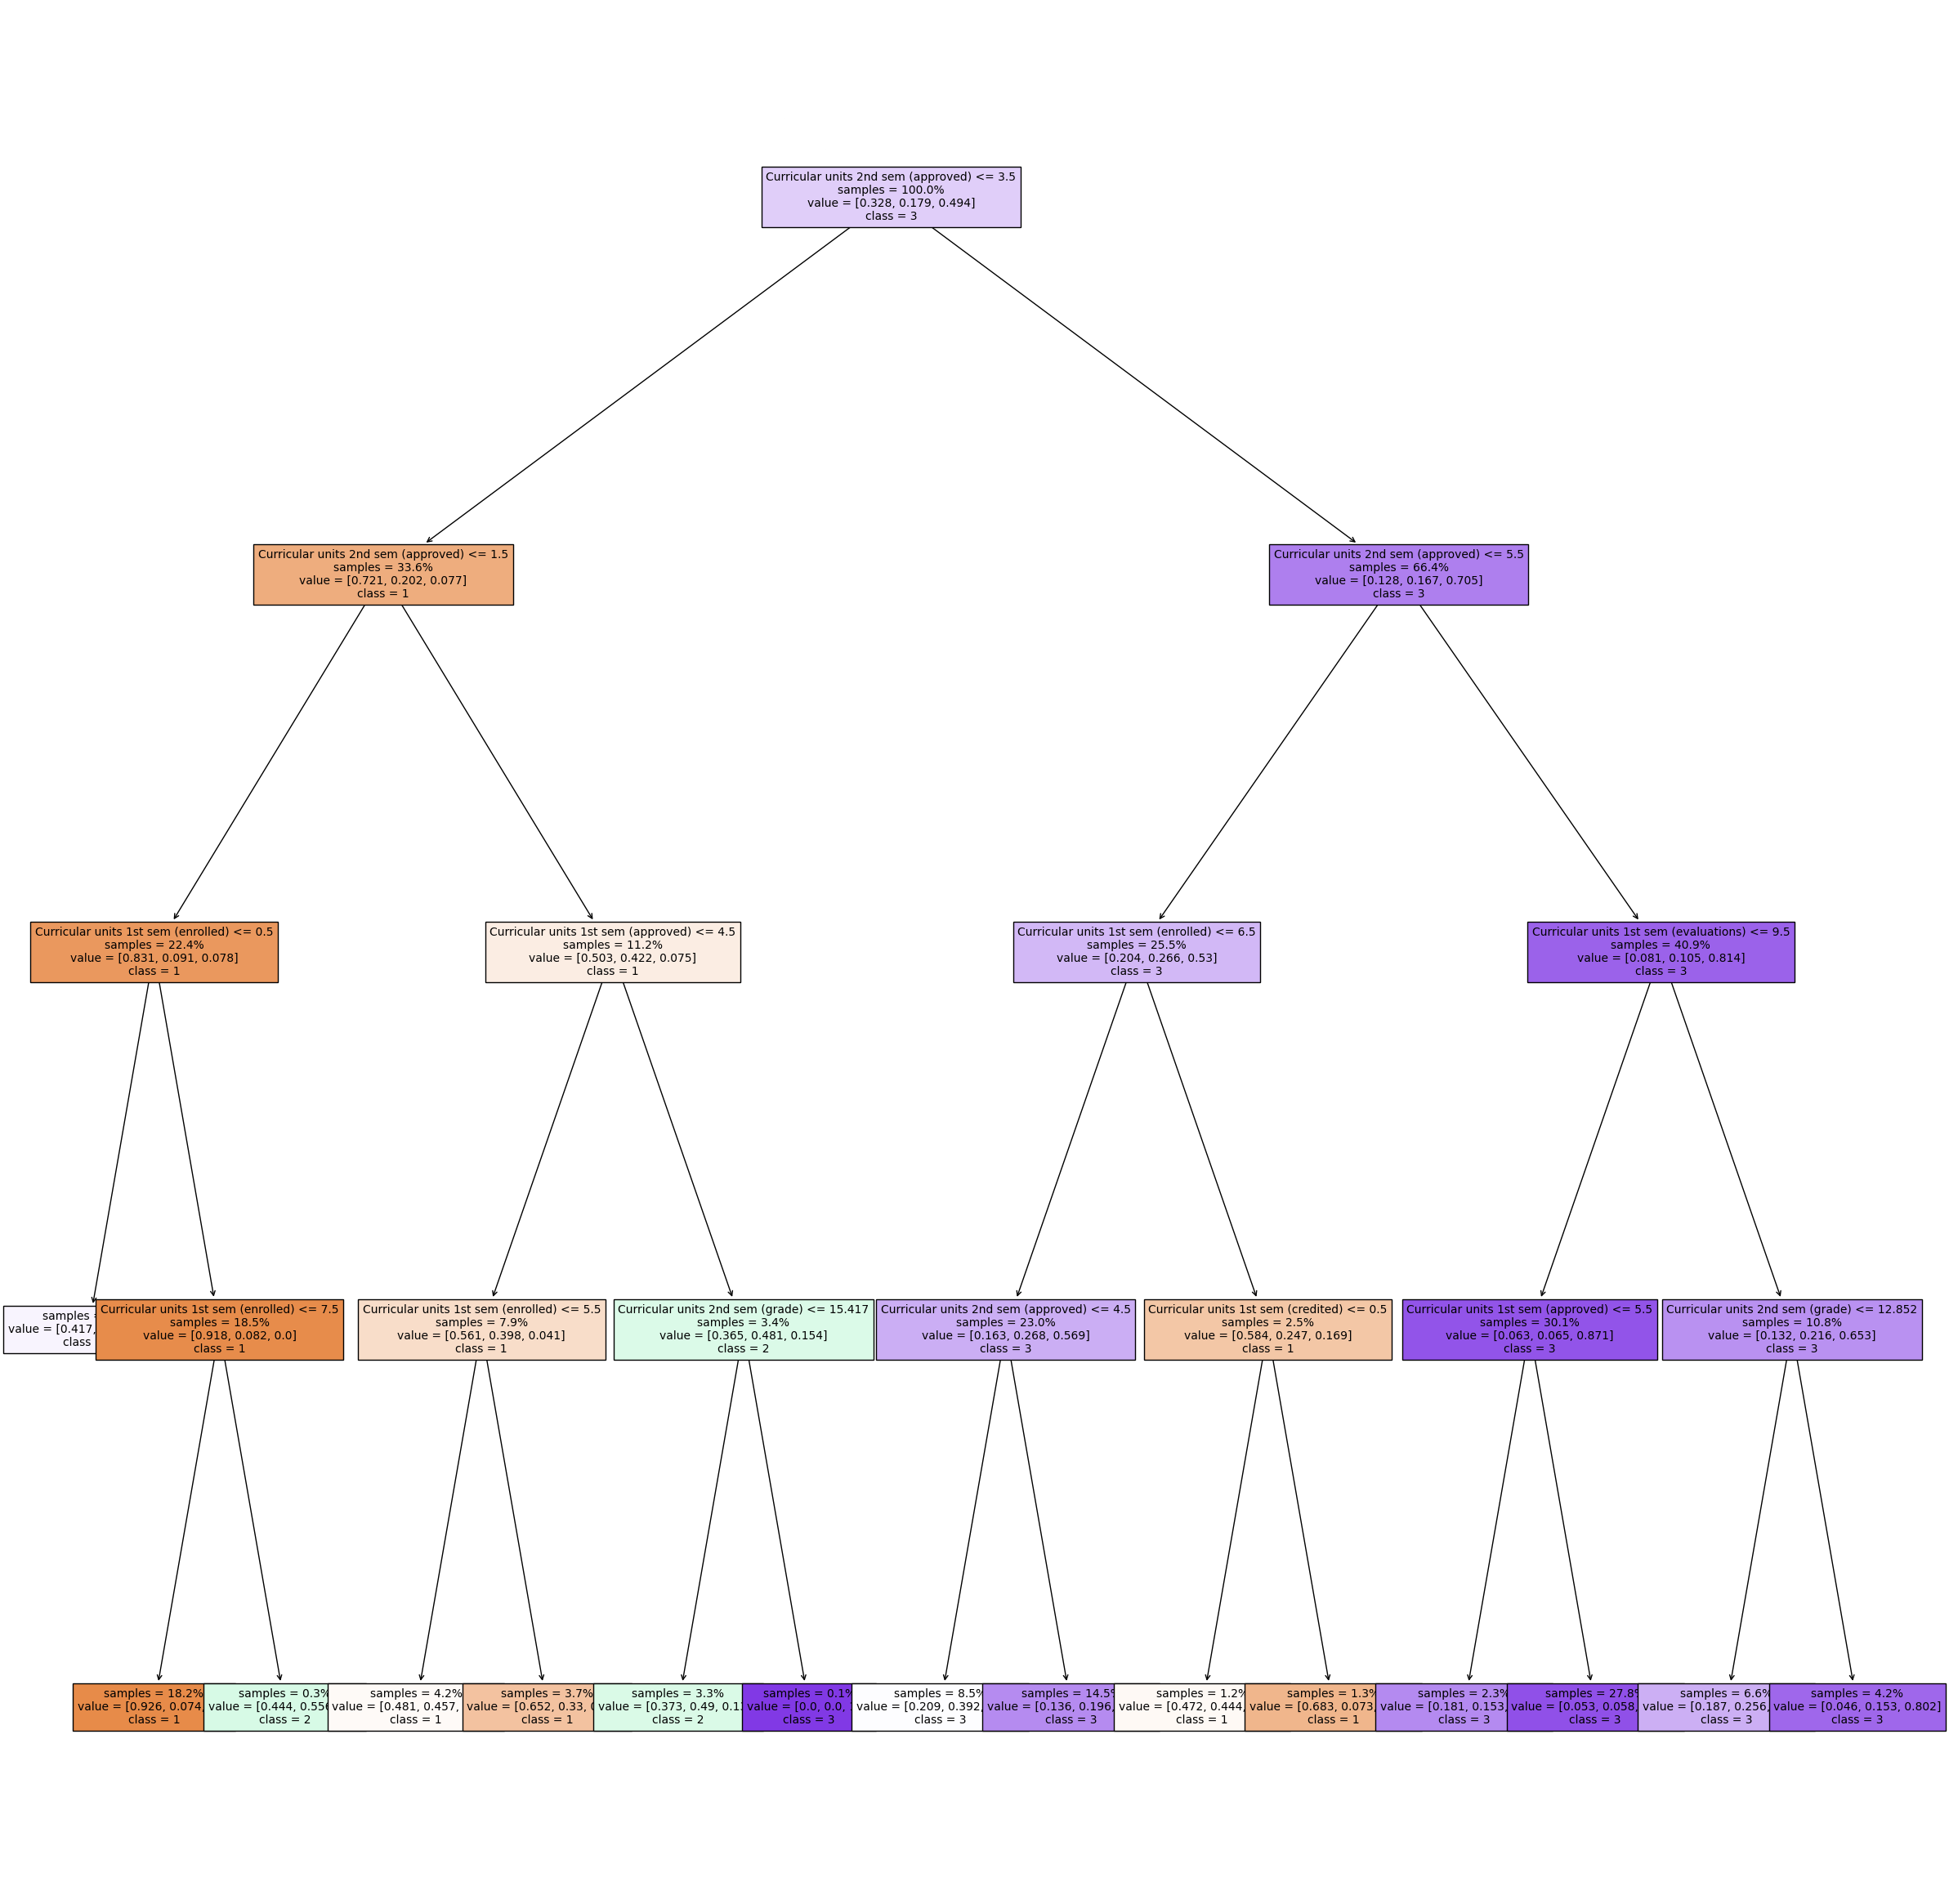

In [ ]:
from sklearn.tree import plot_tree
fig=plt.figure(figsize=((30,30)))
plot_tree(arbol,feature_names=X.columns,class_names=['1','2','3'],impurity=False,proportion=True,filled=True,fontsize=10)
fig.savefig('data.png')

